<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20CNN%20image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import cv2

Libraries imported successfully!
TensorFlow version: 2.19.0
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


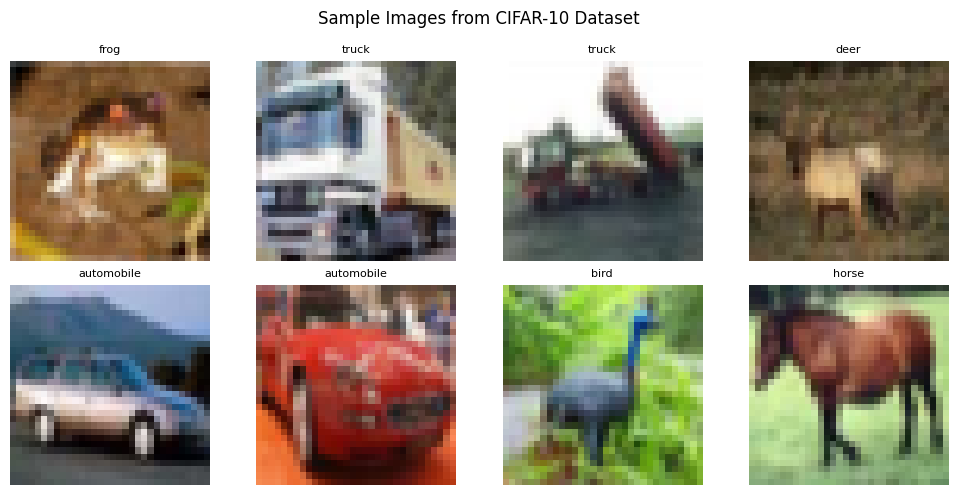

Data preprocessing completed!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,834 (350.91 KB)

 Trainable params: 89,834 (350.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.3238 - loss: 1.8369 - val_accuracy: 0.5114 - val_loss: 1.3471
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5302 - loss: 1.3224 - val_accuracy: 0.5679 - val_loss: 1.1909
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5903 - loss: 1.1669 - val_accuracy: 0.6071 - val_loss: 1.1019
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6285 - loss: 1.0604 - val_accuracy: 0.6348 - val_loss: 1.0372
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.6580 - loss: 0.9802 - val_accuracy: 0.6491 - val_loss: 0.9978


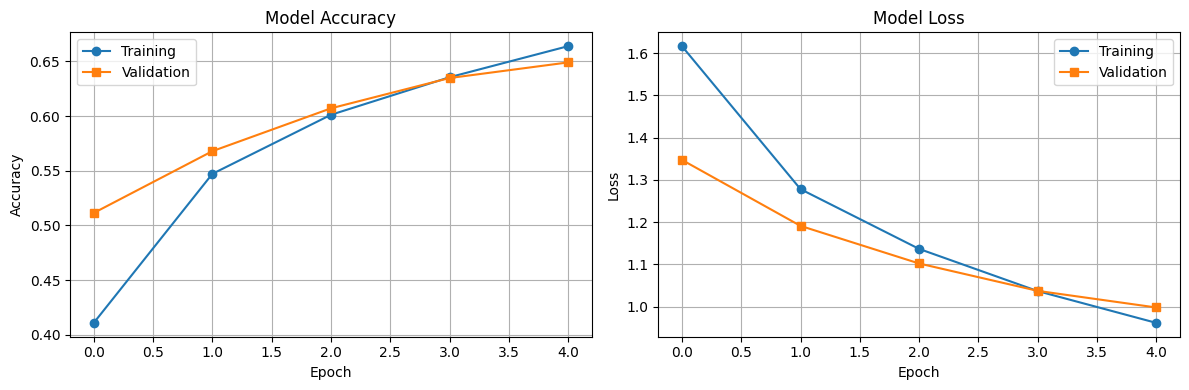

Test Accuracy: 0.6491
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


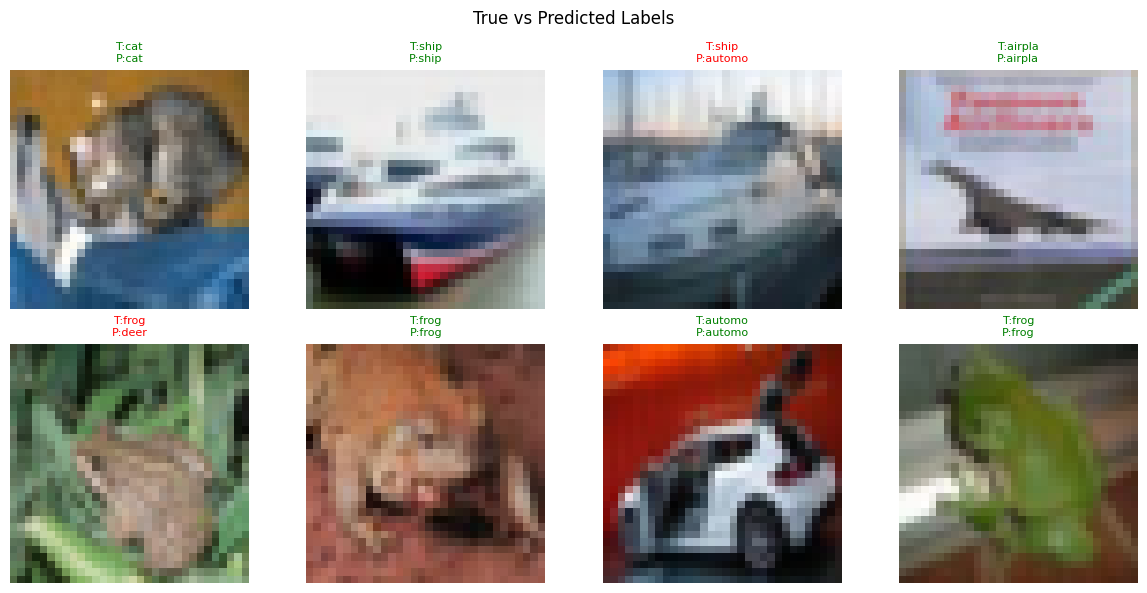


CNN Components Explained:
1. Conv2D: Extracts features using filters
2. MaxPooling2D: Reduces spatial dimensions
3. Dense: Final classification layer
4. Softmax: Outputs probability distribution

Model Performance:
Accuracy: 0.649
Parameters: 89,834

Model saved!


In [3]:
# -*- coding: utf-8 -*-
"""CNN Explainer - Fast Version for Google Colab

This notebook provides a comprehensive explanation of Convolutional Neural Networks (CNNs)
with visualizations and practical examples using TensorFlow/Keras in Google Colab.
Optimized for speed with reduced epochs and smaller model.
"""

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Cell 2: Load and explore the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Cell 3: Visualize sample images (smaller sample for speed)
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'{class_names[y_train[i][0]]}', fontsize=8)
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=12)
plt.tight_layout()
plt.show()

# Cell 4: Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print("Data preprocessing completed!")

# Cell 5: Build a smaller, faster CNN model
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Cell 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Cell 7: Train the model (fewer epochs for speed)
history = model.fit(
    x_train, y_train_categorical,
    batch_size=64,  # Larger batch size for speed
    epochs=5,       # Reduced epochs
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

# Cell 8: Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Training', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='s')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='s')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Cell 9: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Cell 10: Make predictions and visualize results
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=8):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        true_name = class_names[true_labels[i]]
        pred_name = class_names[predicted_labels[i]]

        color = 'green' if true_labels[i] == predicted_labels[i] else 'red'
        plt.title(f'T:{true_name[:6]}\nP:{pred_name[:6]}', color=color, fontsize=8)
        plt.axis('off')
    plt.suptitle('True vs Predicted Labels', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, true_classes, predicted_classes, class_names)

# Cell 11: Simple CNN explanation
print("\nCNN Components Explained:")
print("1. Conv2D: Extracts features using filters")
print("2. MaxPooling2D: Reduces spatial dimensions")
print("3. Dense: Final classification layer")
print("4. Softmax: Outputs probability distribution")

print(f"\nModel Performance:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Parameters: {model.count_params():,}")

# Save model
model.save('fast_cnn_model.h5')
print("\nModel saved!")